## Data Loading

In [ ]:
import pandas as pd
import seaborn as sns
import missingno as msno
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/TMDB_movie_dataset_v11.csv")

In [ ]:
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


## Data Preprocessing


###1.Check Missing Values###

<Axes: >

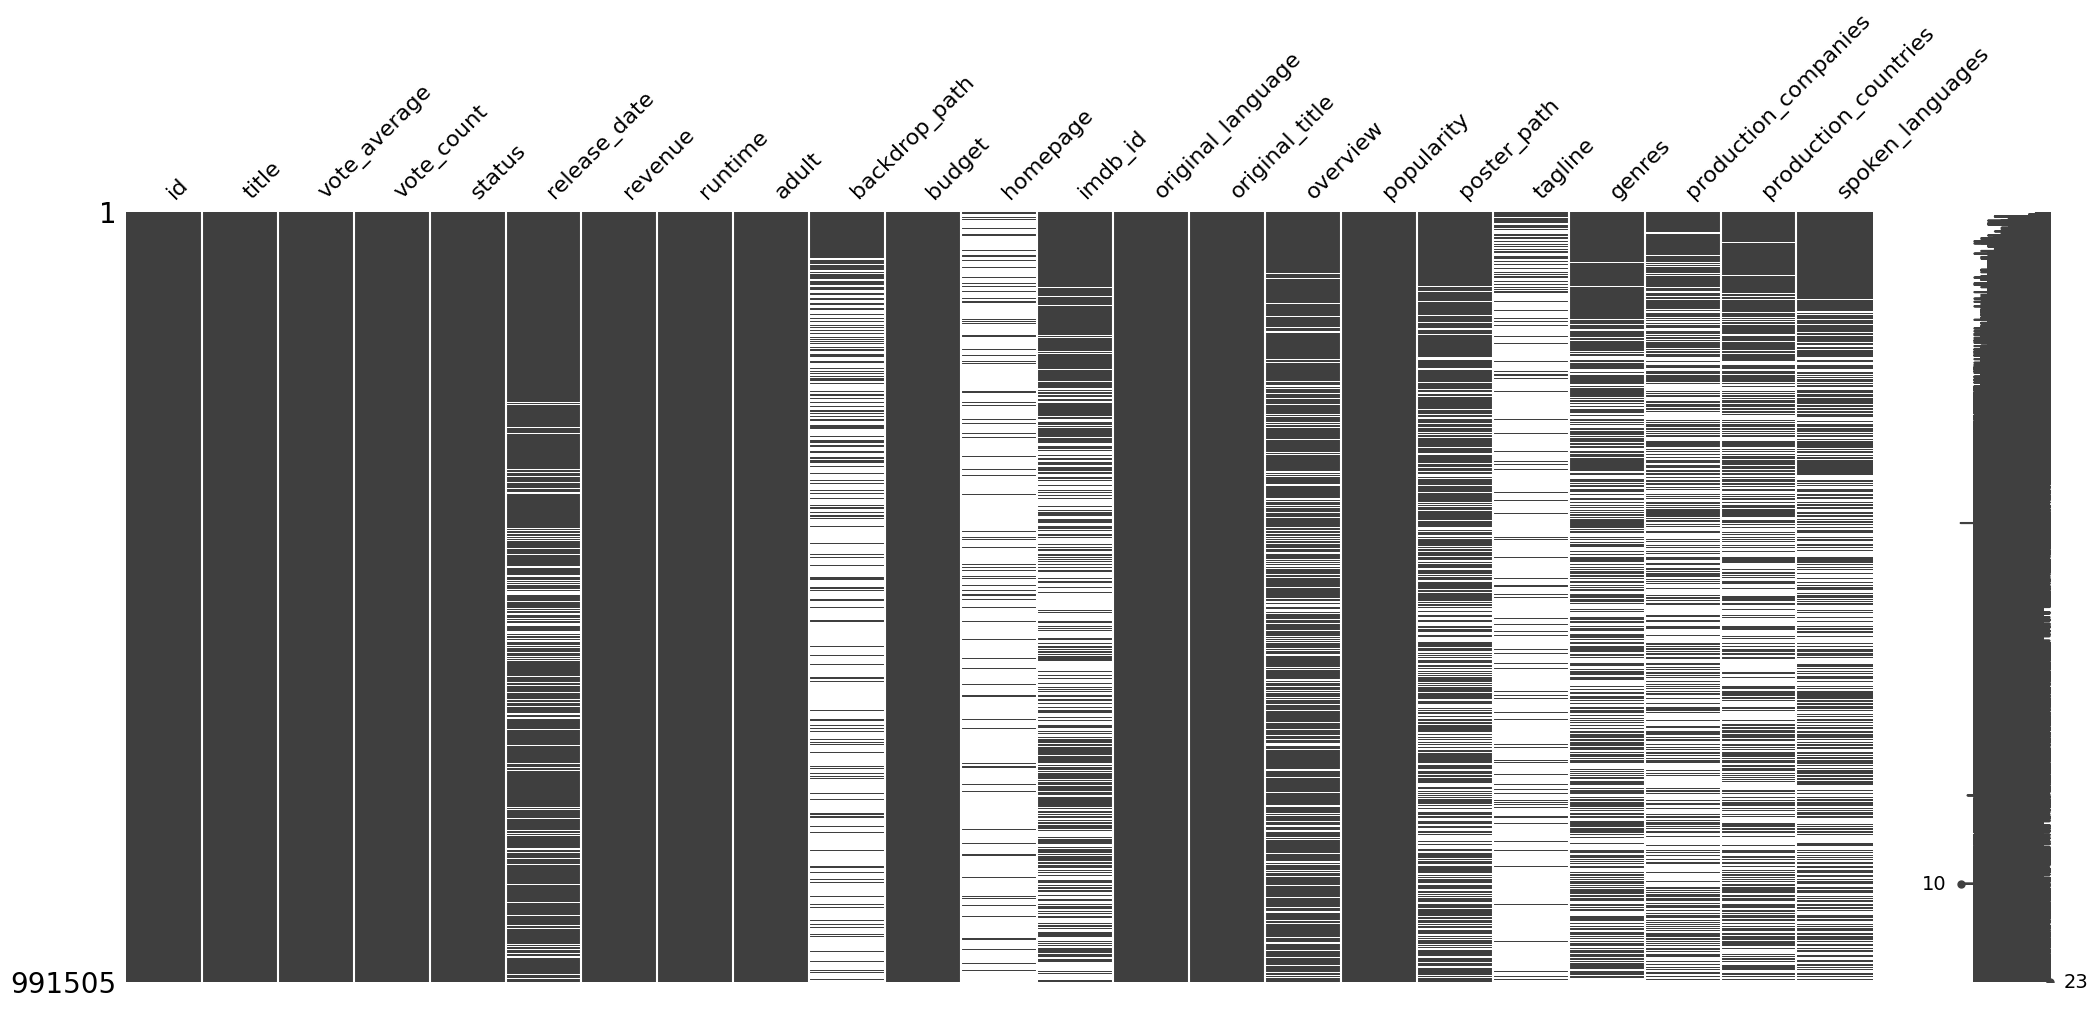

In [ ]:
# Plot the msno
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991505 entries, 0 to 991504
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    991505 non-null  int64  
 1   title                 991493 non-null  object 
 2   vote_average          991505 non-null  float64
 3   vote_count            991505 non-null  int64  
 4   status                991505 non-null  object 
 5   release_date          881511 non-null  object 
 6   revenue               991505 non-null  int64  
 7   runtime               991505 non-null  int64  
 8   adult                 991505 non-null  bool   
 9   backdrop_path         283001 non-null  object 
 10  budget                991505 non-null  int64  
 11  homepage              107518 non-null  object 
 12  imdb_id               569184 non-null  object 
 13  original_language     991505 non-null  object 
 14  original_title        991493 non-null  object 
 15  

In [ ]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,9.915050e+05,991505.000000,991505.000000,9.915050e+05,991505.000000,9.915050e+05,991505.000000
mean,6.562278e+05,2.120968,21.628466,7.500084e+05,50.802460,2.953519e+05,1.361716
std,3.515143e+05,3.116937,340.938660,1.813656e+07,62.308547,5.161645e+06,8.113785
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,-28.000000,0.000000e+00,0.000000
25%,3.673360e+05,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.600000
50%,6.577670e+05,0.000000,0.000000,0.000000e+00,30.000000,0.000000e+00,0.600000
75%,9.624260e+05,5.000000,1.000000,0.000000e+00,90.000000,0.000000e+00,0.920000
max,1.243324e+06,10.000000,34495.000000,3.000000e+09,14400.000000,9.000000e+08,2994.357000


###2.Drop Unused Columns###

In [ ]:
df = df.drop(['id', 'revenue', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'poster_path', 'original_title', 'tagline', 'production_companies', 'spoken_languages'], axis=1)
df.head(5)

,title,vote_average,vote_count,status,release_date,runtime,adult,original_language,overview,popularity,genres,production_countries
0,Inception,8.364,34495,Released,2010-07-15,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America"
1,Interstellar,8.417,32571,Released,2014-11-05,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America"
2,The Dark Knight,8.512,30619,Released,2008-07-16,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America"
3,Avatar,7.573,29815,Released,2009-12-15,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom"
4,The Avengers,7.710,29166,Released,2012-04-25,143,False,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America


###3.Drop Null Values###

In [ ]:
df = df.dropna()
df
#396575

,title,vote_average,vote_count,status,release_date,runtime,adult,original_language,overview,popularity,genres,production_countries
0,Inception,8.364,34495,Released,2010-07-15,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America"
1,Interstellar,8.417,32571,Released,2014-11-05,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America"
2,The Dark Knight,8.512,30619,Released,2008-07-16,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America"
3,Avatar,7.573,29815,Released,2009-12-15,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom"
4,The Avengers,7.710,29166,Released,2012-04-25,143,False,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...
991484,"The Death, Her and Me",0.000,0,Released,2012-09-21,50,False,ja,"After suffering a serious illness as a child, ...",1.093,"Drama, Mystery, Horror",Japan
991486,Dept. of Reincarnation,0.000,0,Released,2018-04-20,3,False,en,"After a selfie-taking mishap, a young woman mu...",0.600,"Fantasy, Comedy",United States of America
991495,8-Bit Symphony @ Home,0.000,0,Released,2019-06-16,116,False,en,Nothing beats the thrill of a live orchestra i...,0.639,Music,United Kingdom
991496,Anmitsu Hime 2,0.000,0,Released,2009-01-11,114,False,ja,The second Anmitsu Hime TV-movie.,1.381,Comedy,Japan


###4.Split 'Date' Column###

In [ ]:
df['year']=df['release_date'].str[:4]
df['month']=df['release_date'].str[5:7]
df.drop('release_date', axis=1, inplace=True)
df
#396575

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,Inception,8.364,34495,Released,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America",2010,07
1,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
2,The Dark Knight,8.512,30619,Released,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",2008,07
3,Avatar,7.573,29815,Released,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",2009,12
4,The Avengers,7.710,29166,Released,143,False,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America,2012,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991484,"The Death, Her and Me",0.000,0,Released,50,False,ja,"After suffering a serious illness as a child, ...",1.093,"Drama, Mystery, Horror",Japan,2012,09
991486,Dept. of Reincarnation,0.000,0,Released,3,False,en,"After a selfie-taking mishap, a young woman mu...",0.600,"Fantasy, Comedy",United States of America,2018,04
991495,8-Bit Symphony @ Home,0.000,0,Released,116,False,en,Nothing beats the thrill of a live orchestra i...,0.639,Music,United Kingdom,2019,06
991496,Anmitsu Hime 2,0.000,0,Released,114,False,ja,The second Anmitsu Hime TV-movie.,1.381,Comedy,Japan,2009,01


###5.Set Year Period###


In [ ]:
df['year'] = df['year'].astype(int)
df = df[(df['year']<2024) & (df['year']>2013)]
df
#149125

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
1,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
5,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
6,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
8,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
15,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991470,The Last Stub Master,0.000,0,Released,48,False,en,"After ten years of harrowing guilt, Jonathan G...",0.600,"Action, Thriller",United States of America,2019,12
991480,Das Double 1977/78 – Eine Zeitreise mit dem 1....,0.000,0,Released,90,False,de,A film about the Bundesliga and DFB-Pokal winn...,0.600,Documentary,Germany,2017,09
991486,Dept. of Reincarnation,0.000,0,Released,3,False,en,"After a selfie-taking mishap, a young woman mu...",0.600,"Fantasy, Comedy",United States of America,2018,04
991495,8-Bit Symphony @ Home,0.000,0,Released,116,False,en,Nothing beats the thrill of a live orchestra i...,0.639,Music,United Kingdom,2019,06


###6.Filter Data###

In [ ]:
df = df[(df['status']=='Released') & (df['original_language']=='en') & (df['vote_count']!=0) & (df['runtime']>0)].reset_index()
df
#33688

,index,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,1,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
1,5,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
2,6,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
3,8,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
4,15,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,346402,Tom,10.000,1,Released,68,False,en,Tom Ballard lives with his father James in a c...,0.600,"Adventure, Documentary",Spain,2015,03
33684,346411,PawParazzi,9.000,1,Released,90,False,en,"London Bridges, a fast rising Hollywood starle...",0.939,Family,United States of America,2019,03
33685,346415,Lost Cities: The Great Flood,3.000,1,Released,45,False,en,"Albert Lin is on a global adventure, from icy ...",0.896,Documentary,United States of America,2021,05
33686,346417,Kids in Brick Houses,10.000,1,Released,7,False,en,A case of home-squatting escalates into an unu...,0.600,"Comedy, Drama, Mystery",United Kingdom,2015,05


In [ ]:
df = df.drop('index',axis=1)
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,production_countries,year,month
0,Interstellar,8.417,32571,Released,169,False,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",2014,11
1,Deadpool,7.606,28894,Released,108,False,en,The origin story of former Special Forces oper...,72.735,"Action, Adventure, Comedy",United States of America,2016,02
2,Avengers: Infinity War,8.255,27713,Released,149,False,en,As the Avengers and their allies have continue...,154.340,"Adventure, Action, Science Fiction",United States of America,2018,04
3,Guardians of the Galaxy,7.906,26638,Released,121,False,en,"Light years from Earth, 26 years after being a...",33.255,"Action, Science Fiction, Adventure",United States of America,2014,07
4,Avengers: Endgame,8.263,23857,Released,181,False,en,After the devastating events of Avengers: Infi...,91.756,"Adventure, Science Fiction, Action",United States of America,2019,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,Tom,10.000,1,Released,68,False,en,Tom Ballard lives with his father James in a c...,0.600,"Adventure, Documentary",Spain,2015,03
33684,PawParazzi,9.000,1,Released,90,False,en,"London Bridges, a fast rising Hollywood starle...",0.939,Family,United States of America,2019,03
33685,Lost Cities: The Great Flood,3.000,1,Released,45,False,en,"Albert Lin is on a global adventure, from icy ...",0.896,Documentary,United States of America,2021,05
33686,Kids in Brick Houses,10.000,1,Released,7,False,en,A case of home-squatting escalates into an unu...,0.600,"Comedy, Drama, Mystery",United Kingdom,2015,05


###7.Add 'Continent' Column###

In [ ]:
def get_continent(countries):
    continents = {
        'Asia': {'Afghanistan', 'Armenia', 'Bahrain', 'Bangladesh', 'Cambodia', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyz Republic', "Lao People's Democratic Republic", 'Lebanon', 'Macao', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territory', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'},
        'Africa': {'Algeria', 'Botswana', 'Cameroon', 'Chad', 'Congo', 'Egypt', 'Eritrea', 'Ethiopia', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Mali', 'Mauritius', 'Morocco', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'},
        'North America': {'Bahamas', 'Barbados', 'Bermuda', 'Canada', 'Costa Rica', 'Dominican Republic', 'Guatemala', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Puerto Rico', 'St. Kitts and Nevis', 'United States of America'},
        'Oceania' : {'American Samoa', 'Cook Islands', 'French Polynesia', 'Northern Mariana Islands'},
        'South America': {'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica, Nicaragua', 'El Salvador', 'Cuba', 'Ecuador', 'Panama', 'Peru', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'},
        'Antarctica': {'South Georgia and the South Sandwich Islands'},
        'Europe': {'Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Netherlands', 'Northern Ireland', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'},
        'Australia': {'Australia', 'Christmas Island', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu'}
    }
    continent_set = set()
    for country in countries:
        for continent, countries_set in continents.items():
            if country in countries_set:
                continent_set.add(continent)
    return ', '.join(continent_set)

# Map the countries to continent and drop the country column
df['continent'] = df.loc[:,'production_countries'].apply(lambda x: get_continent(x.split(', ')))
df = df.drop('production_countries',axis=1)

In [ ]:
def get_dummy(dataframe_name,column_name):
  # Split the column value into list
  data_column = dataframe_name.loc[:,column_name]
  data = list(data_column.apply(lambda x: x.split(',')))
  # Strip blank spaces
  data = [[item.strip() for item in sublist] for sublist in data]
  # Transform data
  te = TransactionEncoder()
  te_data = te.fit(data).transform(data)
  # Create a dataframe from the data
  df_encoded = pd.DataFrame(te_data, columns=te.columns_)
  return(df_encoded)

###8.Get Dummy Variables###

In [ ]:
# Get continent dummy
df_continent = get_dummy(df,'continent')
df_continent

,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,False,False,False,True,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
33683,False,False,False,True,False,False,False
33684,False,False,False,False,True,False,False
33685,False,False,False,False,True,False,False
33686,False,False,False,True,False,False,False


In [ ]:
# Get genre dummy
df_genres = get_dummy(df,'genres')
df_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
33684,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
33685,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
33686,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False


###9.Normalize Numeric Columns###

In [ ]:
# Identify numeric columns
df['year'] = df['year'].astype(str)
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

# Normalization model
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,year,month,continent
0,Interstellar,1.117684,29.447011,Released,1.983690,False,en,The adventures of a group of explorers who mak...,3.723133,"Adventure, Drama, Science Fiction",2014,11,"Europe, North America"
1,Deadpool,0.691243,26.103364,Released,0.714015,False,en,The origin story of former Special Forces oper...,1.855161,"Action, Adventure, Comedy",2016,02,North America
2,Avengers: Infinity War,1.032501,25.029432,Released,1.567403,False,en,As the Avengers and their allies have continue...,4.113269,"Adventure, Action, Science Fiction",2018,04,North America
3,Guardians of the Galaxy,0.848989,24.051891,Released,0.984601,False,en,"Light years from Earth, 26 years after being a...",0.762702,"Action, Science Fiction, Adventure",2014,07,North America
4,Avengers: Endgame,1.036707,21.523013,Released,2.233462,False,en,After the devastating events of Avengers: Infi...,2.381495,"Adventure, Science Fiction, Action",2019,04,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,Tom,1.950058,-0.170227,Released,-0.118559,False,en,Tom Ballard lives with his father James in a c...,-0.140901,"Adventure, Documentary",2015,03,Europe
33684,PawParazzi,1.424237,-0.170227,Released,0.339357,False,en,"London Bridges, a fast rising Hollywood starle...",-0.131520,Family,2019,03,North America
33685,Lost Cities: The Great Flood,-1.730689,-0.170227,Released,-0.597288,False,en,"Albert Lin is on a global adventure, from icy ...",-0.132710,Documentary,2021,05,North America
33686,Kids in Brick Houses,1.950058,-0.170227,Released,-1.388233,False,en,A case of home-squatting escalates into an unu...,-0.140901,"Comedy, Drama, Mystery",2015,05,Europe


###10.Get Final Dataset###

In [ ]:
# Merge dummy genres and continents back to df
df = df.merge(df_genres, how='outer',left_index=True,right_index=True)
df = df.merge(df_continent, how='outer',left_index=True,right_index=True)
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,Interstellar,1.117684,29.447011,Released,1.983690,False,en,The adventures of a group of explorers who mak...,3.723133,"Adventure, Drama, Science Fiction",...,False,False,False,False,False,False,True,True,False,False
1,Deadpool,0.691243,26.103364,Released,0.714015,False,en,The origin story of former Special Forces oper...,1.855161,"Action, Adventure, Comedy",...,False,False,False,False,False,False,False,True,False,False
2,Avengers: Infinity War,1.032501,25.029432,Released,1.567403,False,en,As the Avengers and their allies have continue...,4.113269,"Adventure, Action, Science Fiction",...,False,False,False,False,False,False,False,True,False,False
3,Guardians of the Galaxy,0.848989,24.051891,Released,0.984601,False,en,"Light years from Earth, 26 years after being a...",0.762702,"Action, Science Fiction, Adventure",...,False,False,False,False,False,False,False,True,False,False
4,Avengers: Endgame,1.036707,21.523013,Released,2.233462,False,en,After the devastating events of Avengers: Infi...,2.381495,"Adventure, Science Fiction, Action",...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,Tom,1.950058,-0.170227,Released,-0.118559,False,en,Tom Ballard lives with his father James in a c...,-0.140901,"Adventure, Documentary",...,False,False,False,False,False,False,True,False,False,False
33684,PawParazzi,1.424237,-0.170227,Released,0.339357,False,en,"London Bridges, a fast rising Hollywood starle...",-0.131520,Family,...,False,False,False,False,False,False,False,True,False,False
33685,Lost Cities: The Great Flood,-1.730689,-0.170227,Released,-0.597288,False,en,"Albert Lin is on a global adventure, from icy ...",-0.132710,Documentary,...,False,False,False,False,False,False,False,True,False,False
33686,Kids in Brick Houses,1.950058,-0.170227,Released,-1.388233,False,en,A case of home-squatting escalates into an unu...,-0.140901,"Comedy, Drama, Mystery",...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df = df.replace({True: 1, False: 0})
df

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,Interstellar,1.117684,29.447011,Released,1.983690,0,en,The adventures of a group of explorers who mak...,3.723133,"Adventure, Drama, Science Fiction",...,0,0,0,0,0,0,1,1,0,0
1,Deadpool,0.691243,26.103364,Released,0.714015,0,en,The origin story of former Special Forces oper...,1.855161,"Action, Adventure, Comedy",...,0,0,0,0,0,0,0,1,0,0
2,Avengers: Infinity War,1.032501,25.029432,Released,1.567403,0,en,As the Avengers and their allies have continue...,4.113269,"Adventure, Action, Science Fiction",...,0,0,0,0,0,0,0,1,0,0
3,Guardians of the Galaxy,0.848989,24.051891,Released,0.984601,0,en,"Light years from Earth, 26 years after being a...",0.762702,"Action, Science Fiction, Adventure",...,0,0,0,0,0,0,0,1,0,0
4,Avengers: Endgame,1.036707,21.523013,Released,2.233462,0,en,After the devastating events of Avengers: Infi...,2.381495,"Adventure, Science Fiction, Action",...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,Tom,1.950058,-0.170227,Released,-0.118559,0,en,Tom Ballard lives with his father James in a c...,-0.140901,"Adventure, Documentary",...,0,0,0,0,0,0,1,0,0,0
33684,PawParazzi,1.424237,-0.170227,Released,0.339357,0,en,"London Bridges, a fast rising Hollywood starle...",-0.131520,Family,...,0,0,0,0,0,0,0,1,0,0
33685,Lost Cities: The Great Flood,-1.730689,-0.170227,Released,-0.597288,0,en,"Albert Lin is on a global adventure, from icy ...",-0.132710,Documentary,...,0,0,0,0,0,0,0,1,0,0
33686,Kids in Brick Houses,1.950058,-0.170227,Released,-1.388233,0,en,A case of home-squatting escalates into an unu...,-0.140901,"Comedy, Drama, Mystery",...,0,0,0,0,0,0,1,0,0,0


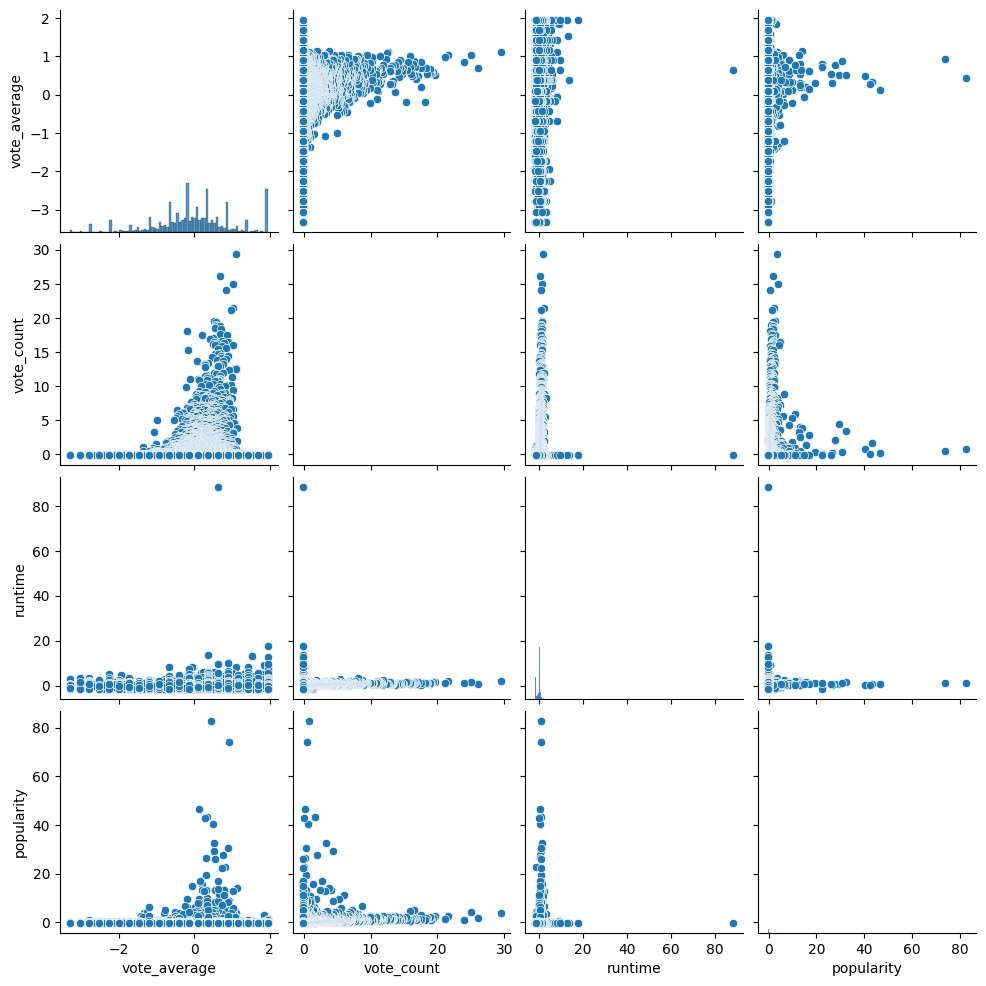

In [ ]:
sns.pairplot(df[['vote_average', 'vote_count', 'runtime', 'popularity']])

##****Data Analysis****##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              33688 non-null  object 
 1   vote_average       33688 non-null  float64
 2   vote_count         33688 non-null  float64
 3   status             33688 non-null  object 
 4   runtime            33688 non-null  float64
 5   adult              33688 non-null  int64  
 6   original_language  33688 non-null  object 
 7   overview           33688 non-null  object 
 8   popularity         33688 non-null  float64
 9   genres             33688 non-null  object 
 10  year               33688 non-null  object 
 11  month              33688 non-null  object 
 12  continent          33688 non-null  object 
 13  Action             33688 non-null  int64  
 14  Adventure          33688 non-null  int64  
 15  Animation          33688 non-null  int64  
 16  Comedy             336

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['vote_average', 'vote_count', 'runtime', 'adult', 'popularity',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Africa', 'Asia', 'Australia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [ ]:
df_num = df[numeric_cols]
df_num

,vote_average,vote_count,runtime,adult,popularity,Action,Adventure,Animation,Comedy,Crime,...,Thriller,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America
0,1.117684,29.447011,1.983690,0,3.723133,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.691243,26.103364,0.714015,0,1.855161,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.032501,25.029432,1.567403,0,4.113269,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.848989,24.051891,0.984601,0,0.762702,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.036707,21.523013,2.233462,0,2.381495,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,1.950058,-0.170227,-0.118559,0,-0.140901,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33684,1.424237,-0.170227,0.339357,0,-0.131520,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33685,-1.730689,-0.170227,-0.597288,0,-0.132710,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33686,1.950058,-0.170227,-1.388233,0,-0.140901,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


###1.Principal Component Analysis###

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_num)

PCA()

In [ ]:
transformed_data_df = pca.transform(df_num)

transformed_data_df.shape

(33688, 31)

In [ ]:
import numpy as np
import plotly.express as px
cum_var_exp = np.cumsum(pca.explained_variance_ratio_*100)
px.line(cum_var_exp)

In [ ]:
pca2 = PCA(9).fit_transform(df_num)
df_pca= pd.DataFrame(pca2,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,22.251886,-4.601008,-1.404191,-19.040596,1.736696,0.234954,-0.027389,-1.222041,0.565762
1,18.421905,-4.028086,-1.265664,-18.076195,0.714239,0.908915,0.764596,-0.592532,0.192355
2,19.472253,-4.127937,-1.823709,-15.702314,0.910210,0.992146,0.005208,-0.719901,0.223037
3,16.623154,-3.638873,-0.309525,-17.058634,0.777376,0.949986,-0.042630,-0.631359,0.143940
4,16.537279,-3.167232,-0.225127,-13.848236,0.744669,0.885112,-0.001561,-0.500663,0.196567
...,...,...,...,...,...,...,...,...,...
33683,-0.208335,-1.879796,0.832547,0.374294,1.054632,0.366936,0.042030,-0.017620,-0.061792
33684,0.073279,-1.074478,0.886349,0.402442,-0.461082,0.171007,-0.019869,0.128240,0.011366
33685,-0.593731,1.278573,-0.968557,-0.393105,0.034361,0.860947,-0.047411,-0.722620,0.017757
33686,-0.801472,-2.296938,-0.097669,-0.070261,0.487372,-1.124732,0.455464,0.271526,0.027362


###2.K-means Clustering###

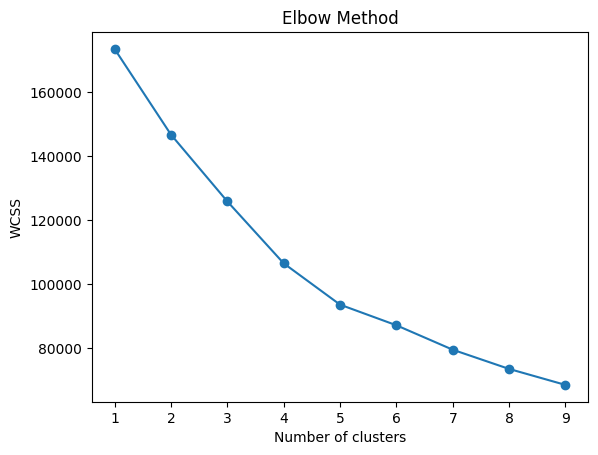

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
num_clusters = 5
kmeans_result = KMeans(num_clusters,init='random',random_state=42).fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_kmeans = df.copy()
df_kmeans['cluster_labels']=kmeans_result.labels_
df_kmeans

,title,vote_average,vote_count,status,runtime,adult,original_language,overview,popularity,genres,...,War,Western,Africa,Asia,Australia,Europe,North America,Oceania,South America,cluster_labels
0,Interstellar,1.117684,29.447011,Released,1.983690,0,en,The adventures of a group of explorers who mak...,3.723133,"Adventure, Drama, Science Fiction",...,0,0,0,0,0,1,1,0,0,3
1,Deadpool,0.691243,26.103364,Released,0.714015,0,en,The origin story of former Special Forces oper...,1.855161,"Action, Adventure, Comedy",...,0,0,0,0,0,0,1,0,0,3
2,Avengers: Infinity War,1.032501,25.029432,Released,1.567403,0,en,As the Avengers and their allies have continue...,4.113269,"Adventure, Action, Science Fiction",...,0,0,0,0,0,0,1,0,0,3
3,Guardians of the Galaxy,0.848989,24.051891,Released,0.984601,0,en,"Light years from Earth, 26 years after being a...",0.762702,"Action, Science Fiction, Adventure",...,0,0,0,0,0,0,1,0,0,3
4,Avengers: Endgame,1.036707,21.523013,Released,2.233462,0,en,After the devastating events of Avengers: Infi...,2.381495,"Adventure, Science Fiction, Action",...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,Tom,1.950058,-0.170227,Released,-0.118559,0,en,Tom Ballard lives with his father James in a c...,-0.140901,"Adventure, Documentary",...,0,0,0,0,0,1,0,0,0,2
33684,PawParazzi,1.424237,-0.170227,Released,0.339357,0,en,"London Bridges, a fast rising Hollywood starle...",-0.131520,Family,...,0,0,0,0,0,0,1,0,0,2
33685,Lost Cities: The Great Flood,-1.730689,-0.170227,Released,-0.597288,0,en,"Albert Lin is on a global adventure, from icy ...",-0.132710,Documentary,...,0,0,0,0,0,0,1,0,0,4
33686,Kids in Brick Houses,1.950058,-0.170227,Released,-1.388233,0,en,A case of home-squatting escalates into an unu...,-0.140901,"Comedy, Drama, Mystery",...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_kmeans['cluster_labels'].value_counts()

1    12968
2     7427
0     7101
4     5834
3      358
Name: cluster_labels, dtype: int64

##****Next Step****##

###1.NLP preprocessing###

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              33688 non-null  object 
 1   vote_average       33688 non-null  float64
 2   vote_count         33688 non-null  float64
 3   status             33688 non-null  object 
 4   runtime            33688 non-null  float64
 5   adult              33688 non-null  int64  
 6   original_language  33688 non-null  object 
 7   overview           33688 non-null  object 
 8   popularity         33688 non-null  float64
 9   genres             33688 non-null  object 
 10  year               33688 non-null  object 
 11  month              33688 non-null  object 
 12  continent          33688 non-null  object 
 13  Action             33688 non-null  int64  
 14  Adventure          33688 non-null  int64  
 15  Animation          33688 non-null  int64  
 16  Comedy             336

In [ ]:
df.overview = df.overview.str.strip()
df.overview = df.overview.str.lower()
df.overview = df.overview.str.replace('[^A-Za-z0-9\s]+','')


<ipython-input-35-5760a2930122>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def process_text(text):
  tokens = word_tokenize(text)
  tokens_remove_stop = [word for word in tokens if word not in stop_words]
  result = [stemmer.stem(word) for word in tokens_remove_stop]
  result = [lemmatizer.lemmatize(word) for word in result]
  return result

###2.1 Bag of Words###

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer= process_text)
bow_transformed = cv.fit_transform(df.overview)
bow_df = pd.DataFrame(bow_transformed.toarray(), columns=cv.get_feature_names_out())
bow_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



,0,00,000,007,009,01,01112012,0119,013,01band,...,zummer,zurab,zuri,zurich,zvi,zwink,zydruna,zygmunt,zygot,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###2.2 TF-IDF###

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(tokenizer = process_text, norm=None)
tfidf_model.fit(df.overview)
tfidf_transformed = tfidf_model.transform(df.overview)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = pd.DataFrame(cosine_similarity(tfidf_transformed, tfidf_transformed))
cos_sim